In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load in dataset
athlete_events = pd.read_csv('athlete_events.csv')

# Impute any missing values
imputer = SimpleImputer(strategy='median')
athlete_events[['Age', 'Height', 'Weight']] = imputer.fit_transform(athlete_events[['Age', 'Height', 'Weight']])

# Convert categorical columns to numeric
athlete_events['Sex'] = athlete_events['Sex'].map({'F': 1, 'M': 0}).astype(int)
athlete_events['Season'] = athlete_events['Season'].map({'Summer': 0, 'Winter': 1}).astype(int)

In [11]:
athlete_events.describe()

,ID,Sex,Age,Height,Weight,Year,Season
count,271116.000000,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000,271116.000000
mean,68248.954396,0.274871,25.502493,175.26374,70.539500,1978.378480,0.179126
std,39022.286345,0.446450,6.287361,9.27917,12.578184,29.877632,0.383459
min,1.000000,0.000000,10.000000,127.00000,25.000000,1896.000000,0.000000
25%,34643.000000,0.000000,22.000000,170.00000,63.000000,1960.000000,0.000000
50%,68205.000000,0.000000,24.000000,175.00000,70.000000,1988.000000,0.000000
75%,102097.250000,1.000000,28.000000,180.00000,75.000000,2002.000000,0.000000
max,135571.000000,1.000000,97.000000,226.00000,214.000000,2016.000000,1.000000


In [12]:
athlete_events.shape

(271116, 15)

In [13]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,0,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,0,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


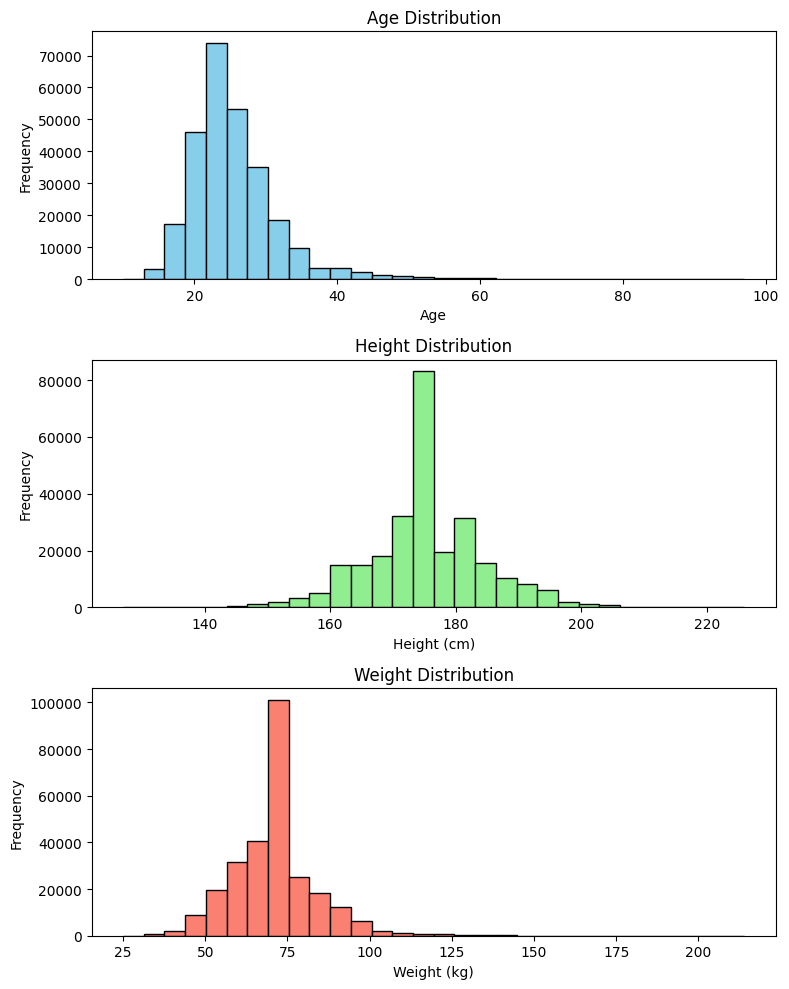

In [14]:
# Plot age, height and weight distributions

fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Age distribution
axes[0].hist(athlete_events['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Height distribution
axes[1].hist(athlete_events['Height'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Height Distribution')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Frequency')

# Weight distribution
axes[2].hist(athlete_events['Weight'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Weight Distribution')
axes[2].set_xlabel('Weight (kg)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Logistic Regression:
  Accuracy: 0.82
  Precision: 0.82
  Recall: 0.82
  F1 Score: 0.82



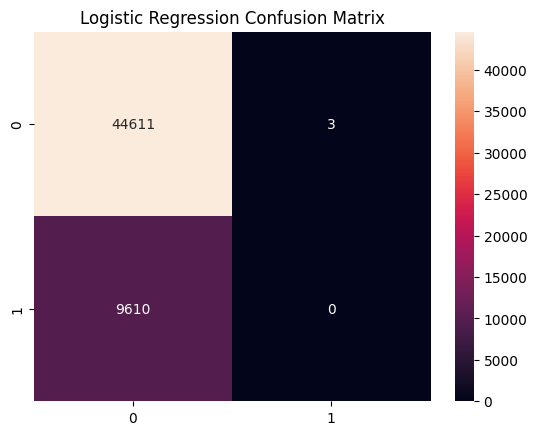

Decision Tree:
  Accuracy: 0.82
  Precision: 0.82
  Recall: 0.82
  F1 Score: 0.82



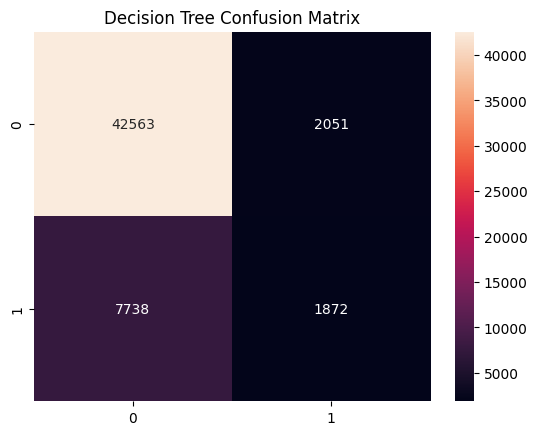

Random Forest:
  Accuracy: 0.82
  Precision: 0.82
  Recall: 0.82
  F1 Score: 0.82



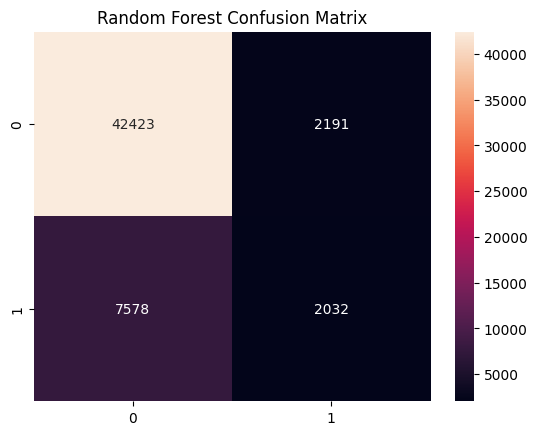

Accuracy: 0.82
F1 Score: 0.82


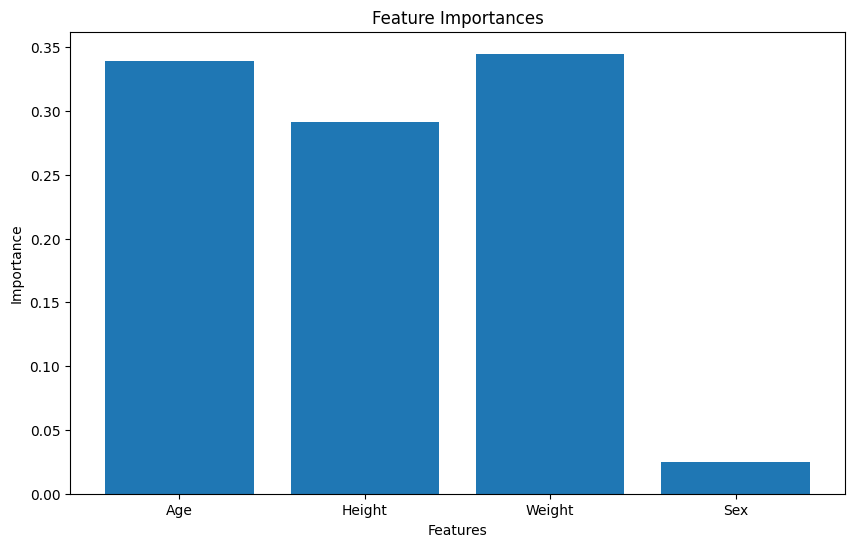

In [15]:
# Data for modeling
X = athlete_events[['Age', 'Height', 'Weight', 'Sex']]
y = athlete_events['Season']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=10)
}

# Model evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"  Precision: {precision_score(y_test, y_pred, average='micro'):.2f}")
    print(f"  Recall: {recall_score(y_test, y_pred, average='micro'):.2f}")
    print(f"  F1 Score: {f1_score(y_test, y_pred, average='micro'):.2f}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

best_model = RandomForestClassifier(n_estimators=100, random_state=10)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Print accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

# Feature Importances
feature_importances = best_model.feature_importances_
features = ['Age', 'Height', 'Weight', 'Sex']
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

athlete_events = pd.read_csv('athlete_events.csv')

athlete_events['won_medal'] = athlete_events['Medal'].notnull().astype(int)

# For breakout athlete prediction, create a feature indicating past participation without winning a medal
athlete_events['participated_before'] = athlete_events.duplicated(subset=['Name'], keep=False)
athlete_events['won_medal_before'] = athlete_events.groupby('Name')['won_medal'].transform('max')
athlete_events['breakout_candidate'] = ((athlete_events['participated_before'] == True) & (athlete_events['won_medal_before'] == 0)).astype(int)

# Handling missing values and encoding categorical variables
athlete_events.fillna({'Age': athlete_events['Age'].median(), 'Height': athlete_events['Height'].median(), 'Weight': athlete_events['Weight'].median()}, inplace=True)
athlete_events.dropna(subset=['Sex', 'Season'], inplace=True)  # Drop rows where 'Sex' or 'Season' is missing
le = LabelEncoder()
athlete_events['Sex'] = le.fit_transform(athlete_events['Sex'])
athlete_events['Season'] = le.fit_transform(athlete_events['Season'])

# Feature selection
features = ['Age', 'Height', 'Weight', 'Sex', 'Season']
X = athlete_events[features]
y = athlete_events['won_medal']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model for predicting medal wins
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred = rf_clf.predict(X_test_scaled)

print("Classification Report for Medal Wins Prediction:")
print(classification_report(y_test, y_pred))

# Identifying breakout candidates
# Filter athletes who have participated before but haven't won a medal
breakout_candidates = athlete_events[(athlete_events['breakout_candidate'] == 1)]

X_breakout = breakout_candidates[features]
y_breakout = breakout_candidates['won_medal']

# Predicting breakout candidates
# Assuming model trained on the entire dataset for simplicity
X_breakout_scaled = scaler.transform(X_breakout)
breakout_predictions = rf_clf.predict(X_breakout_scaled)

print("\nPotential Breakout Athletes in the Upcoming Olympics:")
breakout_candidates['breakout_prediction'] = breakout_predictions
print(breakout_candidates[breakout_candidates['breakout_prediction'] == 1][['Name', 'Sport', 'Team']].drop_duplicates())


Classification Report for Medal Wins Prediction:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     46290
           1       0.27      0.08      0.12      7934

    accuracy                           0.83     54224
   macro avg       0.57      0.52      0.52     54224
weighted avg       0.77      0.83      0.79     54224


Potential Breakout Athletes in the Upcoming Olympics:
                                        Name       Sport  \
125                               Hans Aasns    Shooting   
133                     Erling Rudolf Aastad   Athletics   
288     Mohamed Ibrahim Abd El-Fatah Mohamed   Wrestling   
472                                 Ali Abdo   Wrestling   
1107          Kanat Kalizhanovich Abutalipov      Boxing   
...                                      ...         ...   
270169                         Boris Zlokovi  Water Polo   
270367                           Dragan Zori    Canoeing   
270390                       

C:\Users\joeyt\AppData\Local\Temp\ipykernel_24360\1588002715.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breakout_candidates['breakout_prediction'] = breakout_predictions


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

athlete_events = pd.read_csv('athlete_events.csv')

# Convert medals to binary 'won_medal' feature
athlete_events['won_medal'] = athlete_events['Medal'].notnull().astype(int)
athlete_events.fillna({'Age': athlete_events['Age'].median(), 'Height': athlete_events['Height'].median(), 'Weight': athlete_events['Weight'].median()}, inplace=True)
athlete_events['Sex'] = athlete_events['Sex'].map({'F': 1, 'M': 0}).astype(int)
features = ['Age', 'Height', 'Weight', 'Sex']
X = athlete_events[features]
y = athlete_events['won_medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters for Logistic Regression
logisticRegression_params = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear']
}

# Hyperparameters for Decision Tree
decisisonTree_params = {
    'max_depth': [1, 10, 100, 1000], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']
}

# Hyperparameters for Random Forest
randomForest_params = { 
    'n_estimators': [1, 10, 100],
    'max_depth': [1, 10, 100], 
}

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

params = {
    'Logistic Regression': logisticRegression_params,
    'Decision Tree': decisisonTree_params,
    'Random Forest': randomForest_params,
}


# Train and evaluate models
best_f1 = 0
best_model = None
best_name = ''
for name, model in models.items():
    model_grid = GridSearchCV(estimator=model, param_grid=params[name], cv=5)
    model_grid.fit(X_train_scaled, y_train)
    
    print(f"Best Parameters for {name}: {model_grid.best_params_}")
    print(f"Best Score for {name}: {model_grid.best_score_:.4f}")
    
    # Get the best model from GridSearchCV
    best_estimator = model_grid.best_estimator_
    
    y_pred = best_estimator.predict(X_test_scaled)
    
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{name} F1 Score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_name = name

# Fit the best model
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test_scaled)
plt.title(f'Confusion Matrix for {best_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importances
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.8532
Logistic Regression F1 Score: 0.4605
Best Parameters for Decision Tree: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree: 0.8532
Decision Tree F1 Score: 0.4605


KeyboardInterrupt: 

Classification Report for Medal Wins Prediction:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     46290
           1       0.27      0.08      0.12      7934

    accuracy                           0.83     54224
   macro avg       0.57      0.52      0.52     54224
weighted avg       0.77      0.83      0.79     54224



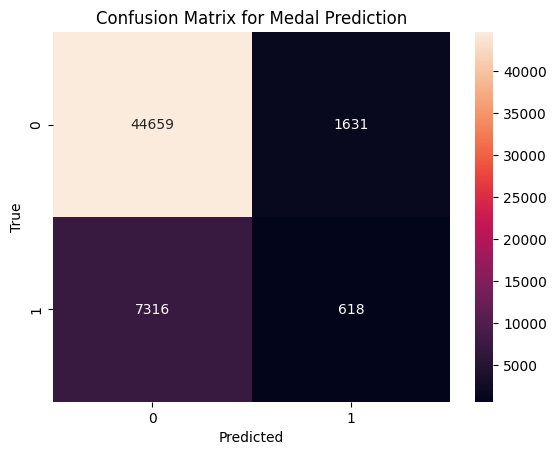

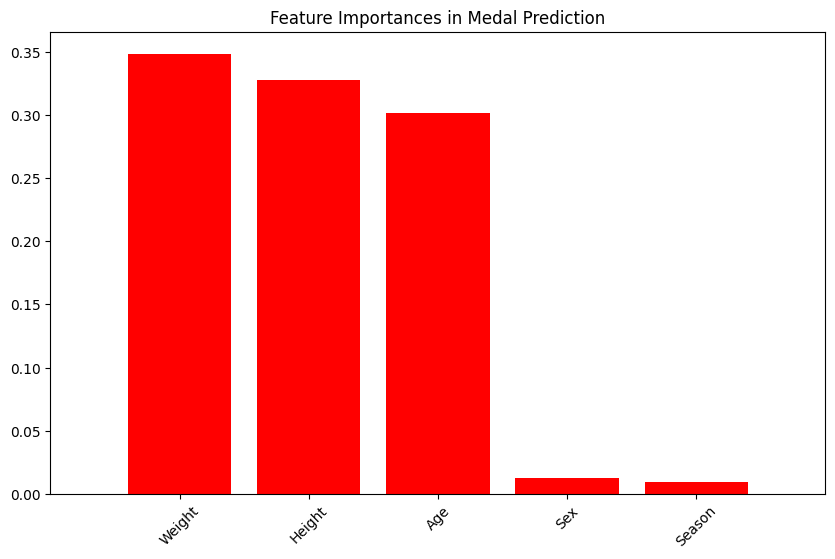


Top 5 Potential Breakout Athletes in the Upcoming Olympics:
                              Name      Sport           Team  \
13131        Eugenio Balanqu Llpiz  Athletics           Cuba   
75908      Cline Garcia (-Cuisant)     Rowing         France   
165314     Peter Robert Mulkerrins     Rowing  Great Britain   
95409   Margarete "Grete" Heublein  Athletics        Germany   
95410   Margarete "Grete" Heublein  Athletics        Germany   

        breakout_prediction_proba  
13131                    0.990000  
75908                    0.980000  
165314                   0.980000  
95409                    0.976333  
95410                    0.976333  


C:\Users\joeyt\AppData\Local\Temp\ipykernel_24360\250191768.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breakout_candidates['breakout_prediction_proba'] = rf_clf.predict_proba(X_breakout_scaled)[:, 1]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

athlete_events = pd.read_csv('athlete_events.csv')

# Convert medals to a binary 'won_medal' feature and handle breakout candidates
athlete_events['won_medal'] = athlete_events['Medal'].notnull().astype(int)
athlete_events['participated_before'] = athlete_events.duplicated(subset=['Name'], keep=False)
athlete_events['won_medal_before'] = athlete_events.groupby('Name')['won_medal'].transform('max')
athlete_events['breakout_candidate'] = ((athlete_events['participated_before'] == True) & (athlete_events['won_medal_before'] == 0)).astype(int)

# Handling missing values and encoding categorical variables
athlete_events.fillna({'Age': athlete_events['Age'].median(), 'Height': athlete_events['Height'].median(), 'Weight': athlete_events['Weight'].median()}, inplace=True)
le = LabelEncoder()
athlete_events['Sex'] = le.fit_transform(athlete_events['Sex'])
athlete_events['Season'] = le.fit_transform(athlete_events['Season'])

# Feature selection
features = ['Age', 'Height', 'Weight', 'Sex', 'Season']
X = athlete_events[features]
y = athlete_events['won_medal']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model for predicting medal wins
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred = rf_clf.predict(X_test_scaled)

# Classification Report and Confusion Matrix for Medal Wins Prediction
print("Classification Report for Medal Wins Prediction:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix for Medal Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Medal Prediction')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Predicting breakout candidates
breakout_candidates = athlete_events[athlete_events['breakout_candidate'] == 1]
X_breakout = breakout_candidates[features]
X_breakout_scaled = scaler.transform(X_breakout)
breakout_candidates['breakout_prediction_proba'] = rf_clf.predict_proba(X_breakout_scaled)[:, 1]

# Selecting top 5 prospects
top_5_prospects = breakout_candidates.sort_values(by='breakout_prediction_proba', ascending=False).head(5)
print("\nTop 5 Potential Breakout Athletes in the Upcoming Olympics:")
print(top_5_prospects[['Name', 'Sport', 'Team', 'breakout_prediction_proba']])
